In [34]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import pickle
from astropy.coordinates import SkyCoord, match_coordinates_3d, match_coordinates_sky
import sys
import emcee
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.table import Table, QTable, hstack, vstack
from astropy import units as u
import corner
from astropy.coordinates import SkyCoord, match_coordinates_3d
cosmo_astropy = FlatLambdaCDM(H0=71.0, Om0=0.265, Ob0 = 0.0448)
import iminuit
from iminuit import Minuit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
sys.path.append('../modules')
import _analysis_list as analysis_list

In [36]:
name = [analysis_list.analysis_list[i]['name'] for i in range(9)]

In [37]:
name

['MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Despali16',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Diemer15_photoz=Truez_hmf=Despali16',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Prada12_photoz=Truez_hmf=Despali16',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Bhattacharya13_photoz=Truez_hmf=Despali16',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Bocquet16',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Bocquet20',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Despali16',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Despali16',
 'MCMC_fit_m-r_WLxN_1-halo=nfw+c-M=Duffy08+cov(g,richness)_photoz=Truez_hmf=Despali16']

In [38]:
where = '../chains/'
name_plot = []
p = []
p_err = []
for i in range(9):
    try:
        name_file = where + name[i] + '.pkl'
        data = np.load(where + name[i] + '.pkl', allow_pickle=True)['flat_chains']
    except: continue
    param = np.mean(data[7000:], axis=0)
    param_err = np.std(data[7000:], axis=0)
    p.append(param)
    p_err.append(param_err)
    name_plot.append(analysis_list.analysis_list[i]['name_plot'])

In [39]:
fiducial = np.load('fiducial.pkl.npy')

In [40]:
fiducial_params = {str(i):np.mean(fiducial[:,i], axis=0) for i in range(6)}
fiducial_params_err = {str(i):np.std(fiducial[:,i], axis=0) for i in range(6)}

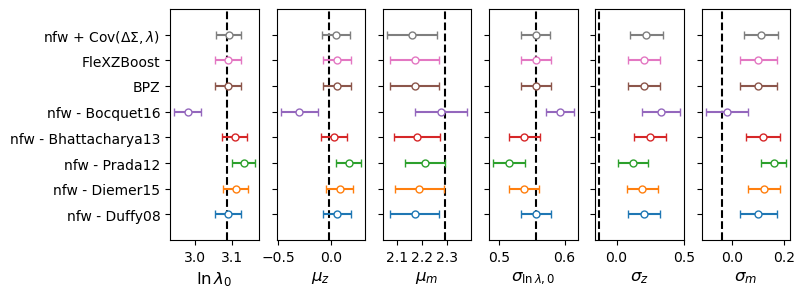

In [41]:
labels_params = [r'$\ln \lambda_0$', r'$\mu_z$', r'$\mu_m$', r'$\sigma_{\ln \lambda, 0}$', r'$\sigma_z$', r'$\sigma_m$']
fig, ax = plt.subplots(1, 6, sharey = True, figsize=(8,3))
for i in range(8):
    for j in range(6):
            ax[j].errorbar(np.array(p[i])[j], name_plot[i], xerr = np.array(p_err[i])[j], 
                           markersize=5, capsize=3, marker='o', markerfacecolor='w')
for j in range(6):
        ax[j].vlines(fiducial_params[str(j)], -1, 10 , zorder=0, color = 'k', ls="--")
        x = np.linspace(fiducial_params[str(j)] - fiducial_params_err[str(j)], fiducial_params[str(j)] + fiducial_params_err[str(j)], 100)
        #ax[j].fill_between(x, 0*x - 10, 0*x + 10 , color = 'C0', alpha=.3, zorder=0)
        ax[j].set_xlabel(labels_params[j], fontsize=12)
ax[0].set_ylim(-1, 8)
plt.savefig('../fig/mcmc_scaling_relation_WL.png',bbox_inches='tight', dpi=300)